In [148]:
import csv
import numpy as np
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt

# Функція для отримання масиву numpy зі значеннями певного стовпця
def get_column_as_numpy_array(zip_path, csv_filename, column_name):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename, 'r') as csvfile:
            reader = csv.reader(csvfile.read().decode('utf-8').splitlines())
            header = next(reader)  
            column_index = header.index(column_name) 
            column_data = [int(row[column_index]) for row in reader if row[column_index].isdigit()]
    return np.array(column_data)

zip_path = 'C:/Users/yaros/Downloads/archive.zip'
csv_filename = 'russia_losses_equipment.csv'

apc_losses = get_column_as_numpy_array(zip_path, csv_filename, 'APC')

print(apc_losses)

# Функція для знаходження добових втрат
def daily_losses(apc_losses):
    return np.diff(apc_losses)

# Обчислення добових втрат БТР
daily_apc_losses = daily_losses(apc_losses)

# результат
print(daily_apc_losses)

# Функція для знаходження 5 найбільших добових втрат БТР
def top_5_daily_losses(apc_losses):
    daily_losses = np.abs(np.diff(apc_losses)) 
    top_5_losses = np.sort(daily_losses)[-5:]  
    return top_5_losses

# 5 найбільших добових втрат БТР
top_5_losses = top_5_daily_losses(apc_losses)
print("5 найбільших добових втрат БТР:", top_5_losses)

# Функція для обчислення середніх втрат за вказаний діапазон днів
def average_losses_in_range(apc_losses, start_day, end_day):
    return np.mean(apc_losses[start_day:end_day])

# Виводимо середні втрати за 100-500 днів війни
average_losses = average_losses_in_range(apc_losses, 100, 500)
print("середні втрати БТР за 100-500 днів війни:",average_losses)


[17063 17043 17003 16955 16938 16925 16906 16897 16878 16878 16869 16848
 16821 16786 16760 16736 16722 16699 16681 16667 16648 16631 16620 16599
 16567 16542 16521 16495 16480 16473 16461 16426 16402 16385 16368 16363
 16350 16341 16332 16323 16294 16286 16255 16238 16211 16203 16161 16141
 16103 16095 16074 16050 16039 16013 16000 15980 15963 15917 15902 15883
 15871 15862 15826 15811 15779 15755 15732 15715 15704 15685 15645 15629
 15611 15600 15583 15566 15550 15524 15505 15480 15459 15450 15431 15413
 15398 15383 15372 15337 15319 15307 15287 15269 15263 15234 15208 15187
 15176 15144 15131 15105 15096 15076 15036 15020 15002 14980 14947 14935
 14913 14891 14858 14818 14803 14786 14775 14748 14721 14699 14665 14630
 14595 14552 14538 14508 14460 14417 14375 14353 14313 14281 14246 14227
 14213 14179 14156 14129 14096 14067 14046 14007 13991 13971 13957 13942
 13928 13916 13904 13896 13873 13852 13835 13827 13809 13796 13765 13745
 13698 13679 13667 13620 13575 13551 13497 13459 13

In [124]:
import pandas as pd
import zipfile

def load_losses_from_zip(zip_file_path, csv_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

def prepare_data_dict(df, date_column, losses_column):
    df[date_column] = pd.to_datetime(df[date_column]) 
    data_dict = pd.Series(df[losses_column].values, index=df[date_column]).to_dict()
    return data_dict

def calculate_losses_in_period(start_date, end_date, data_dict):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Отримання втрат на початку і в кінці періоду
    start_losses = data_dict.get(start_date, 0)
    end_losses = data_dict.get(end_date, 0)
    
    return end_losses - start_losses

# Завантаження даних
df = load_losses_from_zip('C:/Users/Yaros/Downloads/archive.zip', 'russia_losses_equipment.csv')

# Підготовка словника даних
data_dict = prepare_data_dict(df, 'date', 'APC')

# Обчислення втрат за літо 2023 року
losses_in_summer_2023 = calculate_losses_in_period('2023-06-01', '2023-08-31', data_dict)
print(f'Втрати БТР у період з 1 червня 2023 по 31 серпня 2023: {losses_in_summer_2023} одиниць')


Втрати БТР у період з 1 червня 2023 по 31 серпня 2023: 1126 одиниць


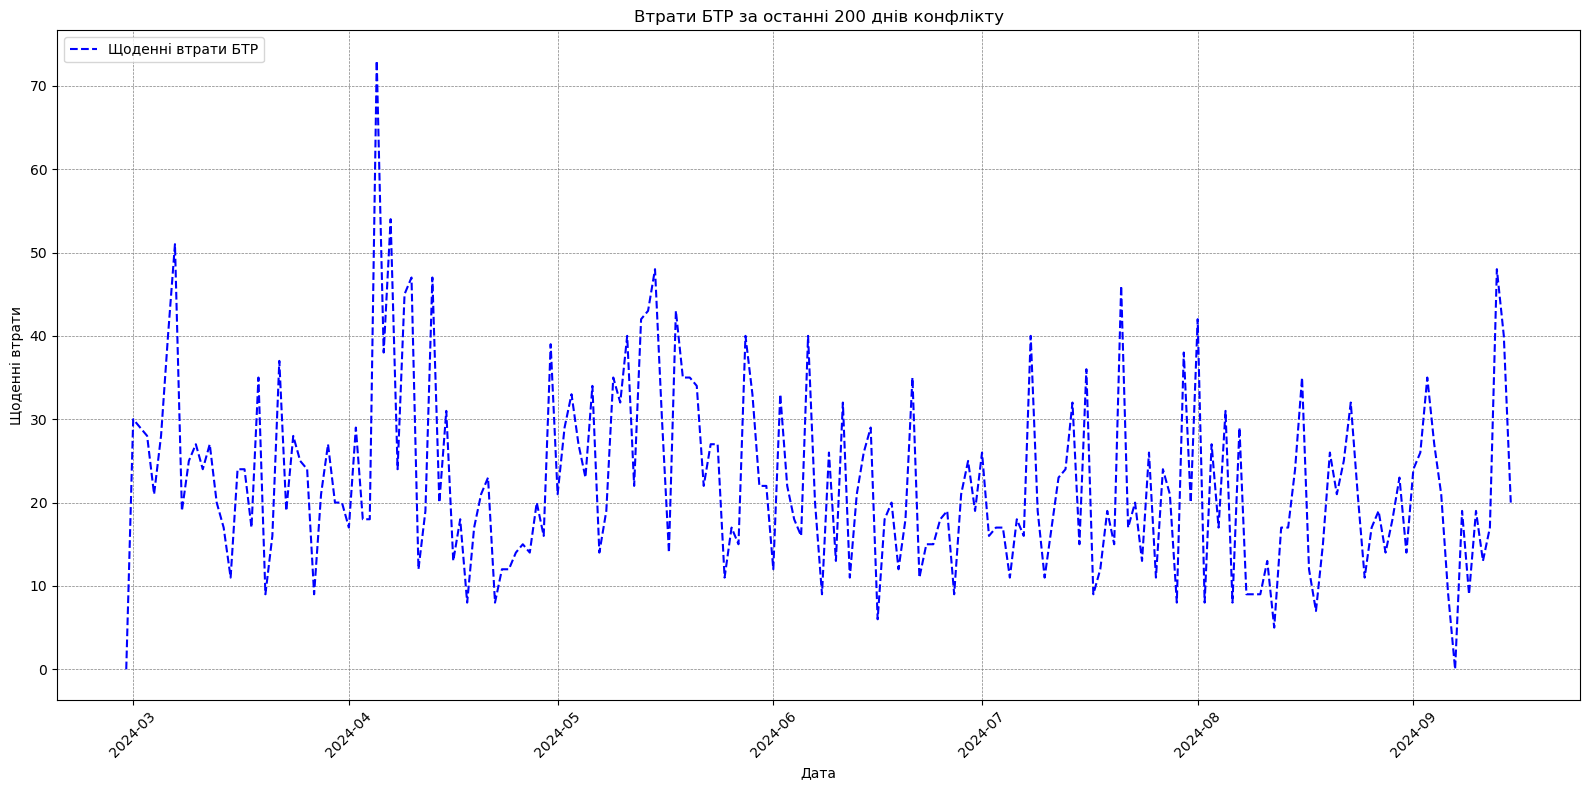

In [146]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

def load_losses_from_zip(zip_file_path, csv_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

def plot_losses_last_200_days(df, date_column, losses_column):
    df[date_column] = pd.to_datetime(df[date_column])
    
    end_date = df[date_column].max()
    start_date = end_date - pd.DateOffset(days=200)
    
    last_200_days_df = df[(df[date_column] > start_date) & (df[date_column] <= end_date)]

    last_200_days_df = last_200_days_df.sort_values(by=date_column)
    last_200_days_df['daily_losses'] = last_200_days_df[losses_column].diff().fillna(0)
    
    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(last_200_days_df[date_column], last_200_days_df['daily_losses'], linestyle='--', color='b', label='Щоденні втрати БТР')
    
    plt.title('Втрати БТР за останні 200 днів конфлікту')
    plt.xlabel('Дата')
    plt.ylabel('Щоденні втрати')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig('C:/Users/yaros/Downloads/apc_losses_last_200_days.png', format='png')
    
    plt.show()

df = load_losses_from_zip('C:/Users/yaros/Downloads/archive.zip', 'russia_losses_equipment.csv')

# Побудова графіку
plot_losses_last_200_days(df, 'date', 'APC')
